<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib

### Step 1: Import Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [4]:
## Write your code here
# Makes a dataframe for repeated rows
df_duplicate_rows = df[df.duplicated()]

# Returns total count of duplicated rows and prints total
duplicate_count = len(df_duplicate_rows)
print('Number of duplicated rows from dataset:', duplicate_count)
print()

# Prints df of duplicated rows
print(df_duplicate_rows.head(5))

Number of duplicated rows from dataset: 20

       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source pro

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [5]:
## Write your code here
df_cleaned = df.drop_duplicates()
print('Before:', len(df))
print('After:', len(df_cleaned))
print('Difference:', len(df) - len(df_cleaned))

Before: 65457
After: 65437
Difference: 20


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [6]:
## Write your code here

# Step 1: Defining where null values exist (remove # to run)
#missing_data = df_cleaned.isnull()
#print(df_cleaned.head(5))

# Step 2: Getting specific on which columns have null/NaN
#for column in missing_data.columns.values.tolist():
    #print (missing_data[column].value_counts())
    #print("")

# Step 3: Confirming most used/inserted value
#df_cleaned['EdLevel'].value_counts().idxmax()

# Step 4: Replacing values with most used
most_used_value = df_cleaned['EdLevel'].value_counts().idxmax()
df_cleaned.loc[:, 'EdLevel'] = df_cleaned['EdLevel'].replace(np.nan, most_used_value)

# Step 5: Confirming replacement
#df_cleaned['EdLevel'].isnull().value_counts()


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [7]:
## Write your code here

# Checking for missing values
df_cleaned['ConvertedCompYearly'].isnull().value_counts()

'''
Output:
ConvertedCompYearly
True     42002
False    23435
Name: count, dtype: int64
With 64.2% of the data missing, and the sensitivity of such
data as salary, it is best to deal with the available data
and not manipulate the missing data with mean or most common
value.
'''
# Filters null values in Converted Comp. Yearly from dataset
df_salary = df_cleaned[df_cleaned['ConvertedCompYearly'].notnull()].copy()

# Normalizes available data
df_salary.loc[:, 'ConvertedCompYearly'] = df_salary['ConvertedCompYearly']/df_salary['ConvertedCompYearly'].max()
print(df_salary['ConvertedCompYearly'])



72       0.000450
374      0.001850
379      0.005616
385      0.003303
389      0.006766
           ...   
41180    0.002746
41184    0.010457
41185    0.007187
41186    0.000738
41187    0.013707
Name: ConvertedCompYearly, Length: 23435, dtype: float64


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


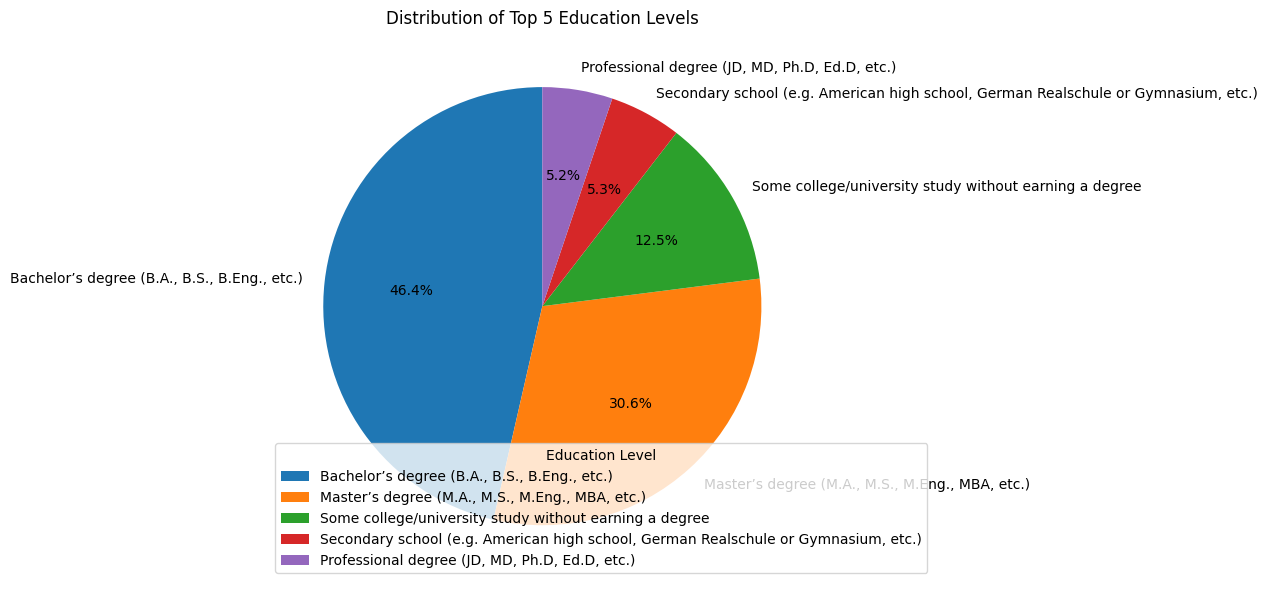

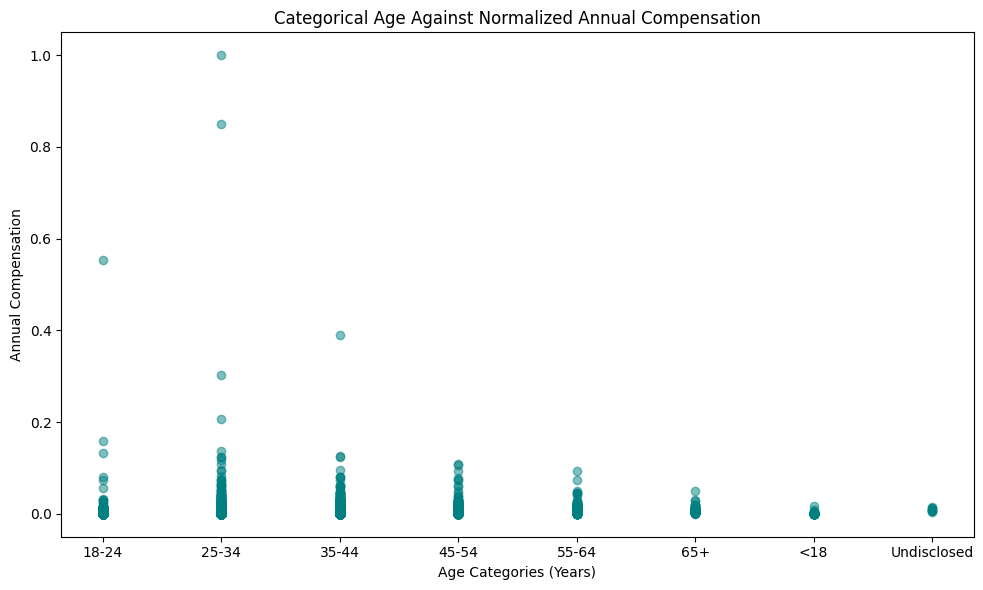

In [8]:
## Write your code here
# Creating pie chart on Top 5 Education level data
top_5_EdLevel = df_salary['EdLevel'].value_counts().head(5)
top_5_EdLevel.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=90,
                   figsize=(10,6))
plt.title('Distribution of Top 5 Education Levels')
plt.legend(title='Education Level', loc='lower left')
plt.ylabel('')
plt.tight_layout()
plt.show()
'''
# Creating distribution histogram for Salary data
threshold = df_salary['ConvertedCompYearly'].quantile(0.90)
filtered_salary = df_salary[df_salary['ConvertedCompYearly'] <= threshold]
filtered_salary['ConvertedCompYearly'].plot(kind='hist',
                                            bins=100,
                                            figsize=(10,6),
                                            color='skyblue',
                                            edgecolor='black')
plt.title('Distribution of Normalized Annual Compensation (Top 80%)')
plt.xlabel('Normalized Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
'''
# Creating scatter plot for Age vs Salary data
label_map = {
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Under 18 years old': '<18',
    'Prefer not to say': 'Undisclosed'
}

# Adds new column with shortened age wording for graphing
df_salary.loc[:,'Age Label'] = df_salary.loc[:,'Age'].map(label_map)

# Plots the scatter graph
plt.figure(figsize=(10,6))
plt.scatter(df_salary['Age Label'], df_salary['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title('Categorical Age Against Normalized Annual Compensation')
plt.xlabel('Age Categories (Years)')
plt.ylabel('Annual Compensation')
#plt.grid(True)
plt.tight_layout()
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
